# Preprocess

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from mlxtend.classifier import StackingClassifier

from xgboost import XGBClassifier

## Missing Value Handling

In [2]:
# Read dataframe from csv to dataframe
df = pd.read_csv('train.csv', header=0)
dftestdata = pd.read_csv('test_data.csv', header=0)

In [3]:
# Feature Engineering. Create onehot encoder data (gender)
# Replace value putri, putra, campur -> 0, 1, 2
df['gender'] = df['gender'].map({'putri':0,'putra':1,'campur':2})

In [4]:
# Check for missing value
df.isnull().sum()

id                0
fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

(3293, 17)


Text(0.5, 1.0, 'Correlation between different features')

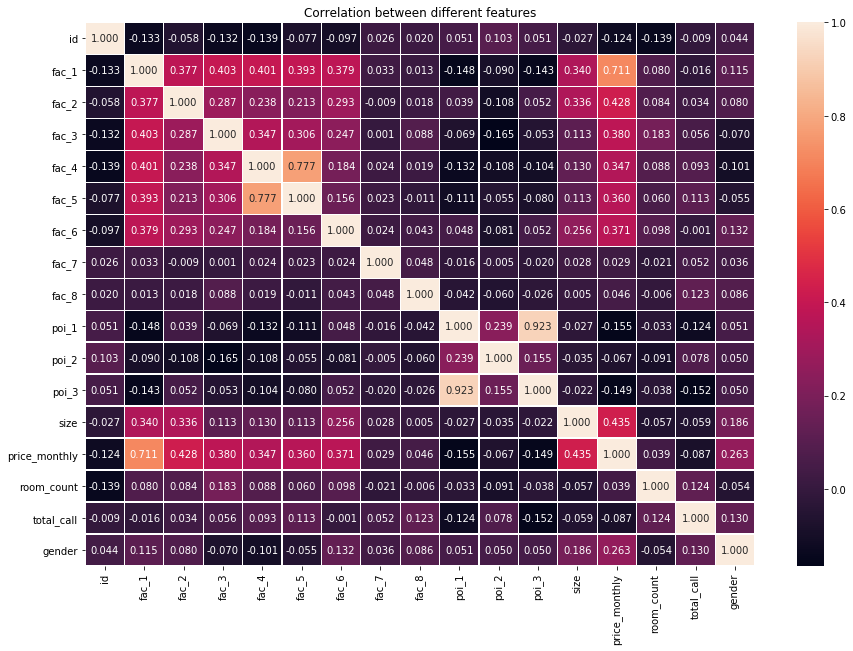

In [5]:
print(df.shape)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

### Drop all rows

(2420, 17)
id               0
fac_1            0
fac_2            0
fac_3            0
fac_4            0
fac_5            0
fac_6            0
fac_7            0
fac_8            0
poi_1            0
poi_2            0
poi_3            0
size             0
price_monthly    0
room_count       0
total_call       0
gender           0
dtype: int64


Text(0.5, 1.0, 'Correlation between different features')

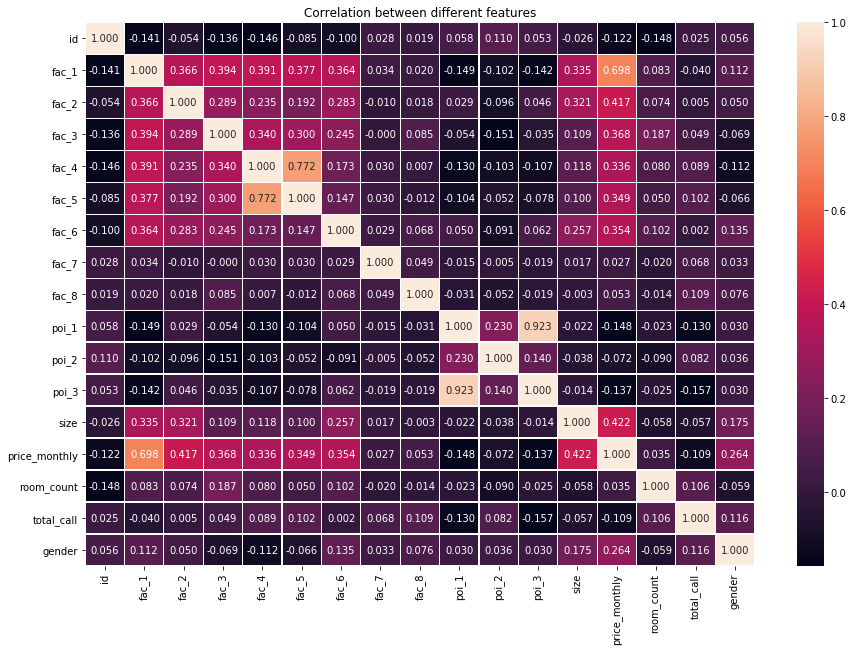

In [6]:
df1 = df.dropna()
print(df1.shape)
print(df1.isnull().sum())

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

### Fill all

#### Median

(3293, 17)
id               0
fac_1            0
fac_2            0
fac_3            0
fac_4            0
fac_5            0
fac_6            0
fac_7            0
fac_8            0
poi_1            0
poi_2            0
poi_3            0
size             0
price_monthly    0
room_count       0
total_call       0
gender           0
dtype: int64


Text(0.5, 1.0, 'Correlation between different features')

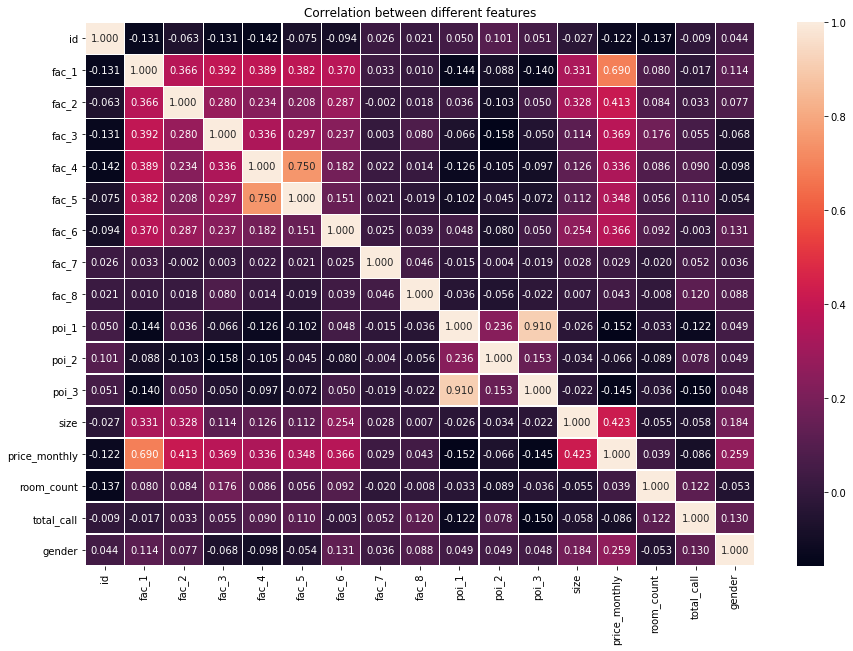

In [7]:
#Median
df2 = df.fillna(df.median())

print(df2.shape)
print(df2.isnull().sum())

plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

#### Mean

(3293, 17)
id               0
fac_1            0
fac_2            0
fac_3            0
fac_4            0
fac_5            0
fac_6            0
fac_7            0
fac_8            0
poi_1            0
poi_2            0
poi_3            0
size             0
price_monthly    0
room_count       0
total_call       0
gender           0
dtype: int64


Text(0.5, 1.0, 'Correlation between different features')

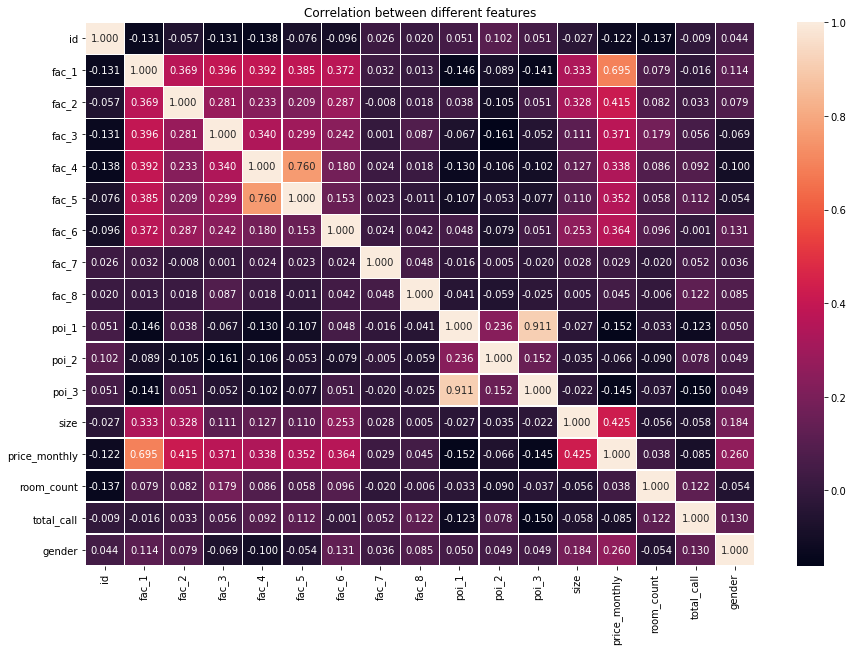

In [8]:
df3 = df.fillna(df.mean())

print(df3.shape)
print(df3.isnull().sum())

plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

#### Mix

(3293, 17)
id               0
fac_1            0
fac_2            0
fac_3            0
fac_4            0
fac_5            0
fac_6            0
fac_7            0
fac_8            0
poi_1            0
poi_2            0
poi_3            0
size             0
price_monthly    0
room_count       0
total_call       0
gender           0
dtype: int64


Text(0.5, 1.0, 'Correlation between different features')

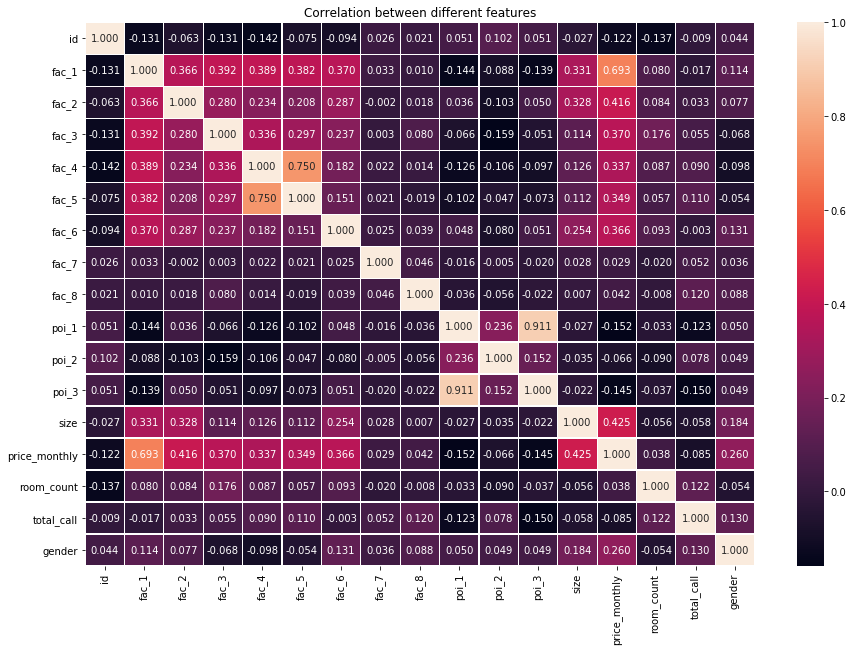

In [9]:
df4 = df.copy()
df4['fac_1']= df4['fac_1'].fillna(df4['fac_1'].median()) 
df4['fac_2']= df4['fac_2'].fillna(df4['fac_2'].median()) 
df4['fac_3']= df4['fac_3'].fillna(df4['fac_3'].median()) 
df4['fac_4']= df4['fac_4'].fillna(df4['fac_4'].median()) 
df4['fac_5']= df4['fac_5'].fillna(df4['fac_5'].median()) 
df4['fac_6']= df4['fac_6'].fillna(df4['fac_6'].median()) 
df4['fac_7']= df4['fac_7'].fillna(df4['fac_7'].median()) 
df4['fac_8']= df4['fac_8'].fillna(df4['fac_8'].median()) 

df4['poi_1']= df4['poi_1'].fillna(df4['poi_1'].mean()) 
df4['poi_2']= df4['poi_2'].fillna(df4['poi_2'].mean()) 
df4['poi_3']= df4['poi_3'].fillna(df4['poi_3'].mean()) 
df4['size']= df4['size'].fillna(df4['size'].mean()) 
df4['price_monthly']= df4['price_monthly'].fillna(df4['price_monthly'].mean()) 
df4['room_count']= df4['room_count'].fillna(df4['room_count'].mean()) 
df4['total_call']= df4['total_call'].fillna(df4['total_call'].mean()) 
print(df4.shape)
print(df4.isnull().sum())

plt.figure(figsize=(15,10))
sns.heatmap(df4.corr(), annot=True, linewidths=.20, fmt='.3f')
plt.title('Correlation between different features')

## Modelling

In [56]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import operator

In [59]:
print(np.bincount(y))

[1729  954  610]


In [31]:
#Separate train & test data
df = df4.copy()

X = df.drop(['id','gender'], axis =1)
y = df.gender

testdata = dftestdata.drop(['id'], axis =1)

#Sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

smt = SMOTE(random_state=42)
XS, yS = smt.fit_sample(X, y)

ada = ADASYN(random_state=42)
XA, yA = ada.fit_sample(X, y)

#Spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XS_train, ySDummy = smt.fit_sample(X_train, y_train)


In [22]:
# Bagging Decision tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed, verbose = 1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

#ytestdata_pred = knn.predict(testdata)

#results = model_selection.cross_val_score(model, X, y, cv=kfold)
#print(results.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7482337829158638


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 42
np.random.seed(seed)
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    vanilla_scores = metrics.accuracy_score(y_test, y_pred)
    #vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    
    bagging_clf = BaggingClassifier(clf, max_features=4, random_state=seed)
    #bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
    
    bagging_clf.fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_test)
    bagging_scores = metrics.accuracy_score(y_test, y_pred)
    #print(bagging_scores)
    
    print ("Mean of : {1:.3f} [{0}]".
           format(clf.__class__.__name__, vanilla_scores))
    print ("Mean of : {1:.3f} [Bagging {0}]\n".
           format(clf.__class__.__name__, bagging_scores))       
    
    #print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".
    #       format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    #print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of : 0.579 [RandomForestClassifier]
Mean of : 0.579 [Bagging RandomForestClassifier]

Mean of : 0.592 [ExtraTreesClassifier]
Mean of : 0.578 [Bagging ExtraTreesClassifier]

Mean of : 0.536 [KNeighborsClassifier]
Mean of : 0.552 [Bagging KNeighborsClassifier]

Mean of : 0.545 [SVC]
Mean of : 0.545 [Bagging SVC]

Mean of : 0.587 [RidgeClassifier]
Mean of : 0.544 [Bagging RidgeClassifier]



In [60]:
from sklearn import ensemble
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingClassifier

ada_boost = ensemble.AdaBoostClassifier()
grad_boost = ensemble.GradientBoostingClassifier()
xgb_boost = XGBClassifier()
boost_array = [ada_boost, grad_boost, xgb_boost]
#eclf = ensemble.EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost], labels):
    scores = cross_val_score(clf, XA, yA, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.598, std: (+/-) 0.073 [Ada Boost]
Mean: 0.644, std: (+/-) 0.081 [Grad Boost]
Mean: 0.630, std: (+/-) 0.083 [XG Boost]


## Best Result

In [54]:
from sklearn.calibration import CalibratedClassifierCV

metLearn=CalibratedClassifierCV(xgb_boost, method='isotonic', cv=10)

metLearn.fit(X, y)

ytestdata_pred = metLearn.predict(testdata)

In [55]:
np.savetxt("XGBISO.csv", ytestdata_pred, delimiter=",")